In [6]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [7]:
test= pd.read_csv(r"sign_mnist_test.csv")
train = pd.read_csv(r"sign_mnist_train.csv")

In [8]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [9]:
labels = train['label'].values

In [10]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<Axes: ylabel='count'>

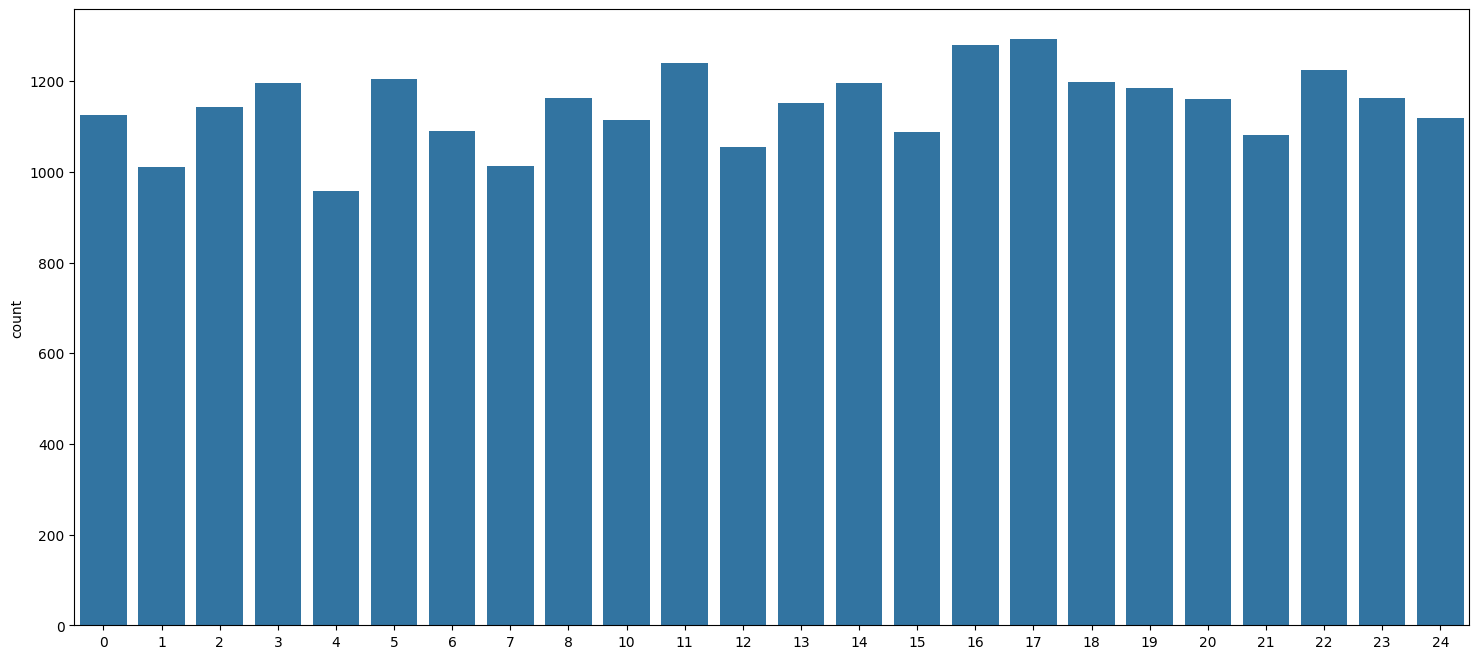

In [11]:
plt.figure(figsize = (18,8))
sns.countplot(x = labels)

In [12]:
train.drop('label', axis = 1,inplace = True)
images = train.values
images = np.array([np.reshape(i,(28,28))for i in images])
images = np.array([i.flatten() for i in images])

In [13]:
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


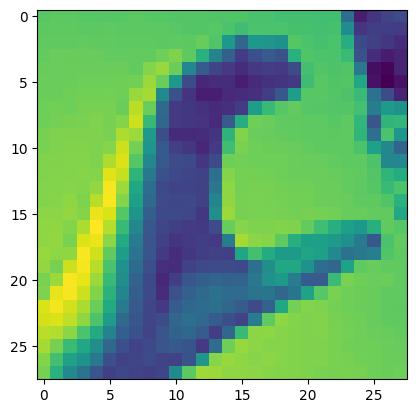

In [14]:
index = 2
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [ ]:
for i in range(0,10):
    rand = np.random.randint(0, len(images))
    input_im = images[rand]
    sample = input_im.reshape(28,28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx=10, fy=10, interpolation = cv2.INTER_CUBIC)
    cv2.imshow("sample image",sample)
    cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [ ]:
batch_size = 128
num_classes = 24
epochs = 10

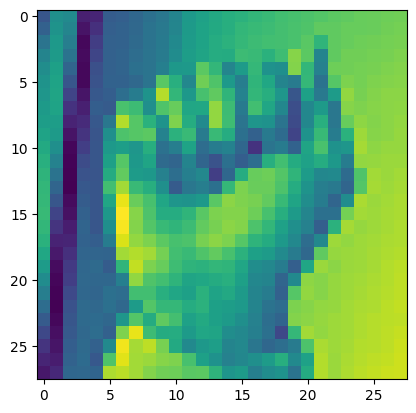

In [ ]:
x_train = x_train / 255
x_test = x_test / 255
x_train  = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test  = x_test.reshape(x_test.shape[0], 28, 28, 1)
plt.imshow(x_train[0].reshape(28,28))

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense (128, activation = 'relu'))
model.add(Dropout (0.20))
model.add(Dense (num_classes, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy',
              optimizer= Adam(),
              metrics=['accuracy'])

c:\Users\91814\miniconda3\envs\FakeNews\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - accuracy: 0.0795 - loss: 3.0581 - val_accuracy: 0.3635 - val_loss: 1.9640
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.4411 - loss: 1.7224 - val_accuracy: 0.6842 - val_loss: 0.9771
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - accuracy: 0.6768 - loss: 0.9493 - val_accuracy: 0.8059 - val_loss: 0.5857
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.7894 - loss: 0.6181 - val_accuracy: 0.8843 - val_loss: 0.3794
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - accuracy: 0.8615 - loss: 0.4101 - val_accuracy: 0.9316 - val_loss: 0.2337
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - accuracy: 0.9045 - loss: 0.2818 - val_accuracy: 0.9318 - val_loss: 0.2011
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.9344 - loss: 0.2048 - val_accuracy: 0.9751 - val_loss: 0.0942
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.9585 - loss: 0.1392 - val

In [ ]:
model.save("signDetection.h5")

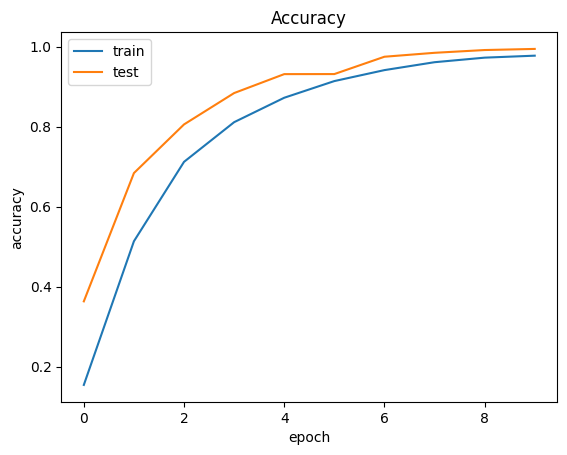

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
test_labels = test['label']
test.drop('label', axis = 1, inplace = True)
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])
test_labels = label_binrizer.fit_transform(test_labels)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
test_images.shape
y_pred = model.predict(test_images)

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, y_pred.round())

0.8236196319018405

In [ ]:
def getLetter(result):
    classLabels = { 0:'A',
                    1:'B',
                    2:'C',
                    3:'D',
                    4:'E',
                    5:'F',
                    6:'G',
                    7:'H',
                    8:'I',
                    9:'K',
                    10:'L',
                    11:'M',
                    12:'N',
                    13:'0',
                    14:'P',
                    15:'Q',
                    16:'R',
                    17:'S',
                    18:'T',
                    19:'U',
                    20:'V',
                    21:'W',
                    22:'X',
                    23:'Y'}
    try:
        res = int(result)
        return classLabels[res]
    except:
      return "Error"

In [ ]:
import cv2
import mediapipe as mp
cap = cv2.VideoCapture(2)

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_style = mp.solutions.draring_styles

hands = mp_hands.Hands(sta)